<a href="https://colab.research.google.com/github/sehxxnee/AI/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/clustering_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,x,y
0,1.84,4.61
1,5.66,4.80
2,6.35,3.29
3,2.90,4.61
4,3.23,4.94


In [ ]:
df.columns

Index(['x', 'y'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [ ]:
df.describe()

,x,y
count,300.000000,300.000000
mean,3.684173,2.987387
std,1.925789,1.684993
min,-0.245000,0.206000
25%,2.160000,1.215000
50%,3.230000,2.950000
75%,5.507500,4.810000
max,8.200000,5.780000


In [ ]:
df.isnull().sum()

,0
x,0
y,0


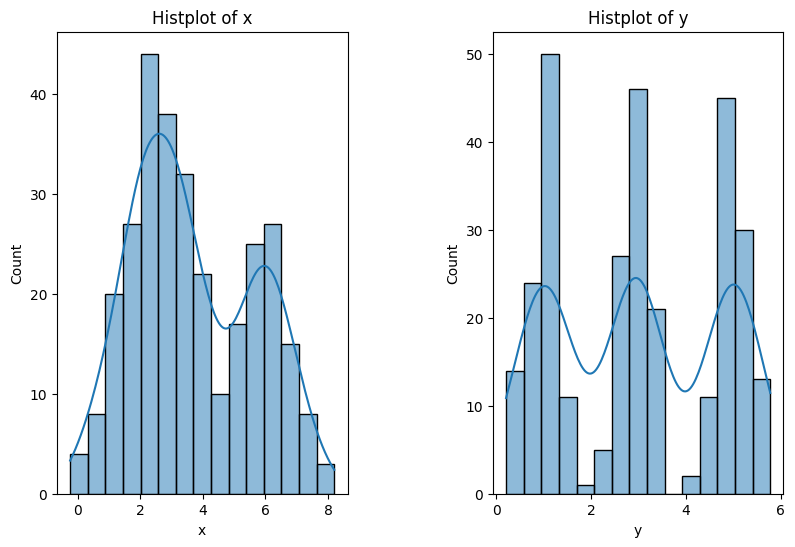

In [ ]:

plt.figure(1, figsize=(15, 6))
n = 0
for x in ['x', 'y']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=15, kde=True)
    plt.title('Histplot of {}'.format(x))
plt.show()


Text(0.5, 0, 'y')

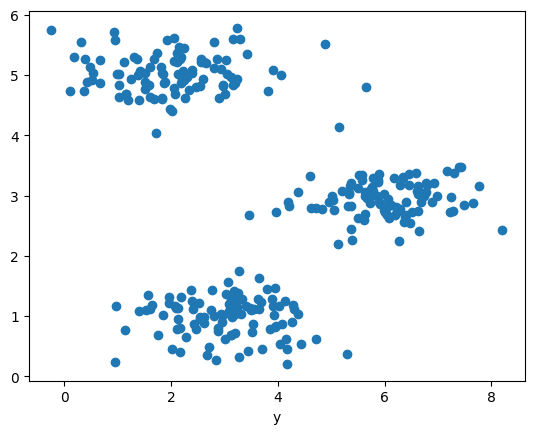

In [ ]:
plt.scatter(x = 'x', y='y', data=df)
plt.xlabel('x')
plt.xlabel('y')

Inertia values for different cluster counts: [1957.8120901333346, 913.3932569015535, 266.4776056066426, 211.33264293388785, 161.0306291550032, 120.73777001806646, 102.45654080835862, 88.6819439952335, 77.17277034383137]


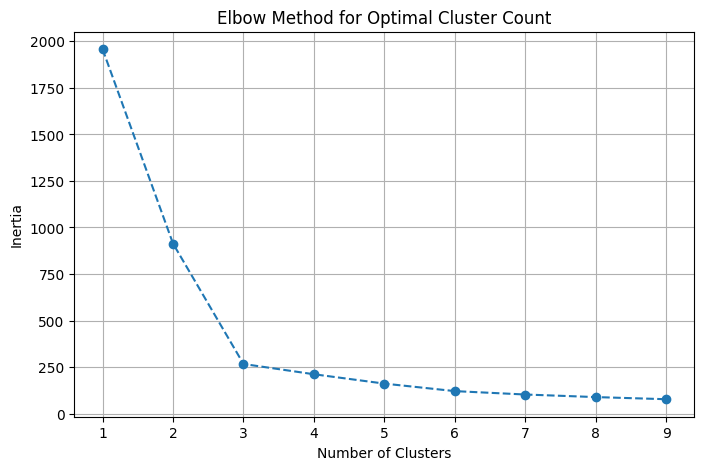

In [ ]:
X1 = df[['x', 'y']].iloc[:, :].values

inertia = []
for n in range(1, 10):
    if n == 1:
        algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='lloyd')
    else:
        algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

print("Inertia values for different cluster counts:", inertia)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Count')
plt.grid(True)
plt.show()


Text(0, 0.5, 'J')

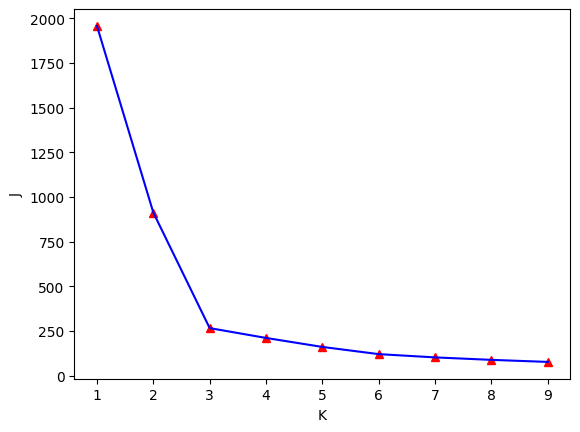

In [ ]:
plt.plot(np.arange(1,10), inertia, '^', color='r')
plt.plot(np.arange(1,10), inertia, '-', color='b')
plt.xlabel('K')
plt.ylabel('J')

Number of Clusters: 2, SSE for Each Cluster: [813.1795051641791, 100.21375173737374], Total SSE: 913.3932569015528
Number of Clusters: 3, SSE for Each Cluster: [92.60775713725491, 91.44466946938776, 82.42517899999999], Total SSE: 266.47760560664267
Number of Clusters: 4, SSE for Each Cluster: [92.60775713725491, 19.097991688888893, 74.74506262626261, 24.881831481481484], Total SSE: 211.33264293388788
Number of Clusters: 5, SSE for Each Cluster: [34.817030234375, 19.097991688888893, 67.76003917525773, 14.473736575, 24.881831481481484], Total SSE: 161.0306291550031
Number of Clusters: 6, SSE for Each Cluster: [22.233007407407403, 19.097991688888893, 14.473736575, 15.074645652173912, 24.881831481481484, 24.976557213114752], Total SSE: 120.73777001806644
Number of Clusters: 7, SSE for Each Cluster: [9.264858333333333, 24.976557213114752, 14.473736575, 15.074645652173912, 7.875373913043478, 8.558361714285713, 22.233007407407403], Total SSE: 102.45654080835858
Number of Clusters: 8, SSE for 

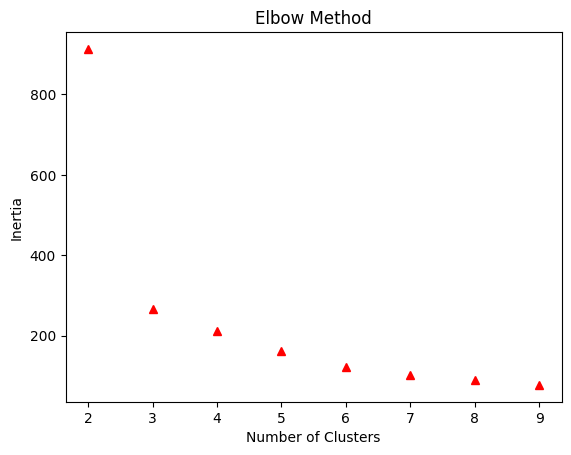

In [ ]:
K1 = df[['x','y']].iloc[:,:].values
inertia = []
silhouette_scores = []
for n in range(2,10):
  algorithm = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter = 300, tol = 0.0001, random_state = 111, algorithm = 'elkan'))
  algorithm.fit(X1)
  inertia.append(algorithm.inertia_)

  labels = algorithm.labels_
  silhouette_avg = silhouette_score(X1, labels)
  silhouette_scores.append(silhouette_avg)

  sse_per_cluster = [np.sum((X1[labels==i] - algorithm.cluster_centers_[i])**2) for i in range(n)]
  sse_total = np.sum(sse_per_cluster)

  print(f'Number of Clusters: {n}, SSE for Each Cluster: {sse_per_cluster}, Total SSE: {sse_total}')

table_data = {'Number of Clusters' : range(2,10), 'Silhouette Score' : silhouette_scores}
table_df = pd.DataFrame(table_data)
print("\nTable of Cluster and Silhouette Scores:")
print(table_df)

plt.plot(range(2,10), inertia, '^', color='r')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 3, init='k-means++', n_init=10, max_iter = 300, tol = 0.0001, random_state = 111, algorithm = 'elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:,0].min() -1, X1[:,0].max()+1
y_min, y_max = X1[:,1].min() -1, X1[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

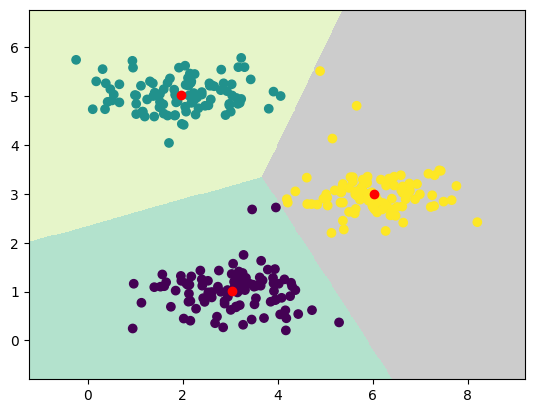

In [ ]:
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel2, aspect='auto', origin='lower')
plt.scatter(x='x', y='y', data=df, c=labels1)
plt.scatter(x = centroids1[:,0], y = centroids1[:,1],color='r')
plt.show()

The new data point is predicted to belong to Cluster 1


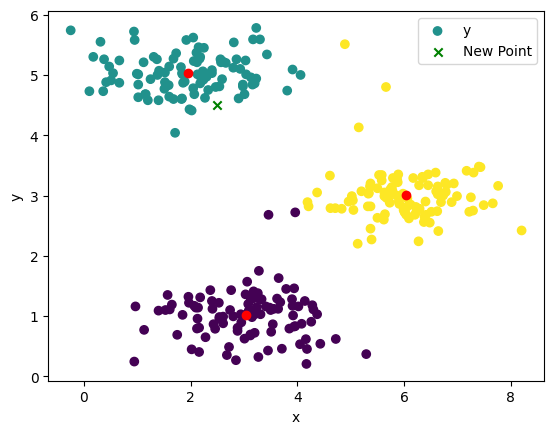

In [ ]:
X_nex = np.array([[2.5, 4.5]])
new_point_cluster = algorithm.predict(X_nex)
plt.scatter(x = 'x' , y = 'y', data=df, c=labels1)
plt.scatter(x=centroids1[:,0], y= centroids1[:,1], color='r')
plt.scatter(x = X_nex[:,0], y = X_nex[:,1], color='g', marker = 'x', label = 'New Point')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
print(f'The new data point is predicted to belong to Cluster {new_point_cluster[0]}')

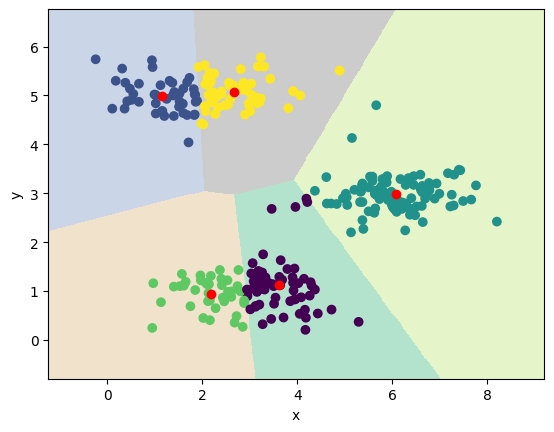

In [ ]:
algorithm = (KMeans(n_clusters = 5, init='k-means++', n_init=10, max_iter = 300, tol = 0.0001, random_state = 111, algorithm = 'elkan'))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X1[:,0].min() -1, X1[:,0].max()+1
y_min, y_max = X1[:,1].min() -1, X1[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel2, aspect='auto', origin='lower')
plt.scatter(x='x', y='y', data=df, c=labels1)
plt.scatter(x = centroids1[:,0], y = centroids1[:,1],color='r')
plt.ylabel('y'), plt.xlabel('x')
plt.show()


In [ ]:
cluster_summary = df.copy()
cluster_summary['Cluster'] = labels1
summary_stats = cluster_summary.groupby('Cluster').agg(['mean', 'median', 'std'])
print(summary_stats)


                x                          y                 
             mean median       std      mean median       std
Cluster                                                      
0        3.623750  3.525  0.506486  1.117891  1.095  0.544172
1        1.158844  1.250  0.567389  4.981778  5.000  0.334836
2        6.083608  6.040  0.761418  2.978247  2.970  0.355073
3        2.172600  2.170  0.520956  0.944025  0.993  0.315795
4        2.669815  2.550  0.609653  5.071111  5.020  0.312716


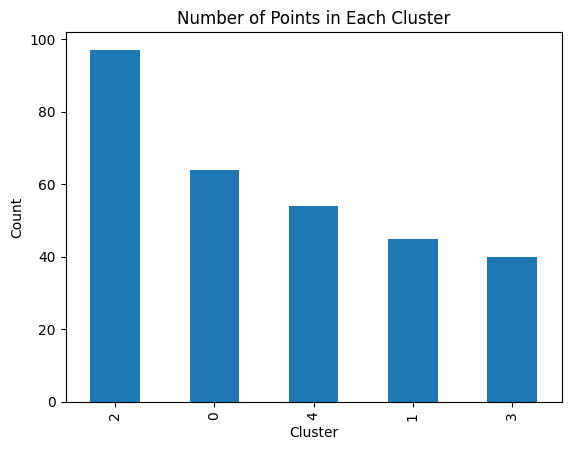

In [ ]:
cluster_counts = cluster_summary['Cluster'].value_counts()
cluster_counts.plot(kind='bar')
plt.title('Number of Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

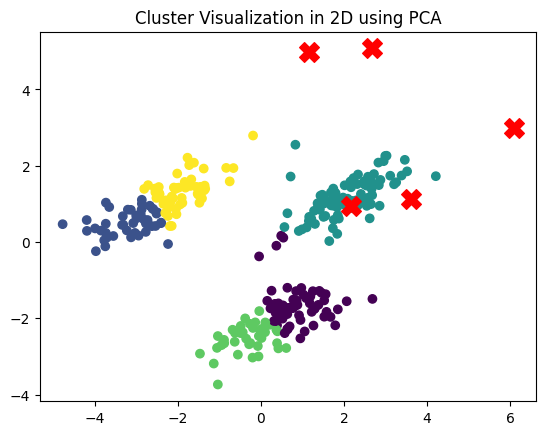

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels1, cmap='viridis')
plt.scatter(centroids1[:, 0], centroids1[:, 1], color='red', marker='X', s=200)
plt.title('Cluster Visualization in 2D using PCA')
plt.show()

In [ ]:
from scipy.spatial.distance import cdist

distances = cdist(X1, centroids1, 'euclidean')
outlier_threshold = 2.0
outliers = np.where(distances.min(axis=1) > outlier_threshold)[0]
print(f"Outliers found: {outliers}")


Outliers found: [ 84 266]


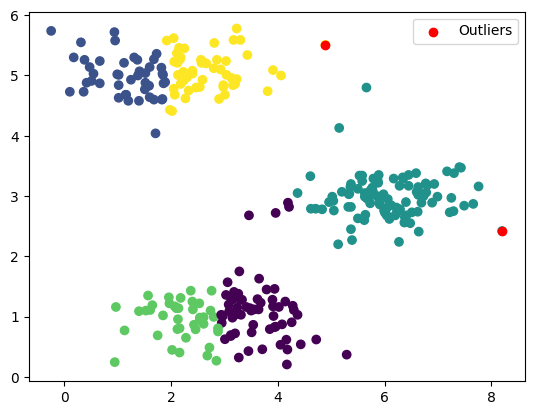

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], c=labels1, cmap='viridis')
plt.scatter(X1[outliers, 0], X1[outliers, 1], color='red', label='Outliers')
plt.legend()
plt.show()


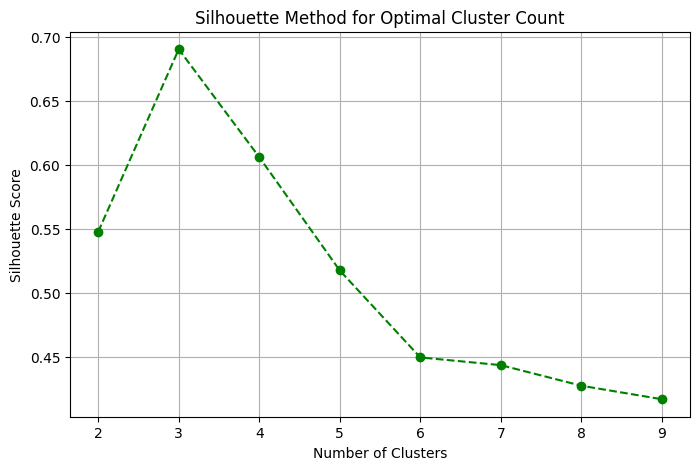

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Cluster Count')
plt.grid(True)
plt.show()


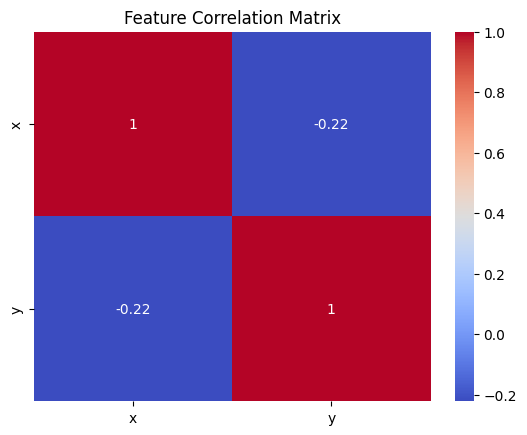

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter(df, x='x', y='y', color=labels1.astype(str), title="Interactive Cluster Plot")
fig.show()


In [ ]:
for cluster in range(algorithm.n_clusters):
    print(f"Cluster {cluster} Summary:")
    print(df[labels1 == cluster].describe())


Cluster 0 Summary:
               x          y
count  64.000000  64.000000
mean    3.623750   1.117891
std     0.506486   0.544172
min     2.940000   0.206000
25%     3.195000   0.817500
50%     3.525000   1.095000
75%     3.975000   1.280000
max     5.290000   2.890000
Cluster 1 Summary:
               x          y
count  45.000000  45.000000
mean    1.158844   4.981778
std     0.567389   0.334836
min    -0.245000   4.040000
25%     0.666000   4.730000
50%     1.250000   5.000000
75%     1.600000   5.210000
max     1.890000   5.740000
Cluster 2 Summary:
               x          y
count  97.000000  97.000000
mean    6.083608   2.978247
std     0.761418   0.355073
min     4.370000   2.200000
25%     5.580000   2.760000
50%     6.040000   2.970000
75%     6.600000   3.170000
max     8.200000   4.800000
Cluster 3 Summary:
               x          y
count  40.000000  40.000000
mean    2.172600   0.944025
std     0.520956   0.315795
min     0.946000   0.245000
25%     1.932500   0.784500
